In [11]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
agency = pd.read_csv('/kaggle/input/dmrc-dataset/agency.txt')
calendar = pd.read_csv('/kaggle/input/dmrc-dataset/calendar.txt')
routes = pd.read_csv('/kaggle/input/dmrc-dataset/routes.txt')
shapes = pd.read_csv('/kaggle/input/dmrc-dataset/shapes.txt')
stop_times = pd.read_csv('/kaggle/input/dmrc-dataset/stop_times.txt')
stops = pd.read_csv('/kaggle/input/dmrc-dataset/stops.txt')
trips = pd.read_csv('/kaggle/input/dmrc-dataset/trips.txt')
df = pd.read_csv("/kaggle/input/csv-file/Delhi metro.csv")
delhi_metro_2022=pd.read_excel("/kaggle/input/hibbbbb/delhimetropassengersloadperkm.xlsx")




In [14]:
df.head

<bound method NDFrame.head of      ID (Station ID)                 Station Names  \
0                1.0  Shaheed Sthal(First Station)   
1                2.0                  Hindon River   
2                3.0                       Arthala   
3                4.0                   Mohan Nagar   
4                5.0                    Shyam park   
..               ...                           ...   
333              NaN                    Conn: Pink   
334              4.0                Delhi Aerocity   
335              5.0                   IGI Airport   
336              6.0              Dwarka Sector 21   
337              NaN                    Conn: Blue   

     Dist. From First Station(km)   Metro Line Opened(Year)       Layout  \
0                             0.0     Red line   08-03-2019     Elevated   
1                             1.0     Red line   08-03-2019     Elevated   
2                             2.5     Red line   08-03-2019     Elevated   
3                

In [15]:
df.isnull().sum()

ID (Station ID)                 53
Station Names                    3
Dist. From First Station(km)    53
Metro Line                      53
Opened(Year)                    53
Layout                          53
Latitude                        52
Longitude                       52
dtype: int64

In [16]:
df_cleaned = df.dropna()
df_cleaned.isnull().sum()

ID (Station ID)                 0
Station Names                   0
Dist. From First Station(km)    0
Metro Line                      0
Opened(Year)                    0
Layout                          0
Latitude                        0
Longitude                       0
dtype: int64

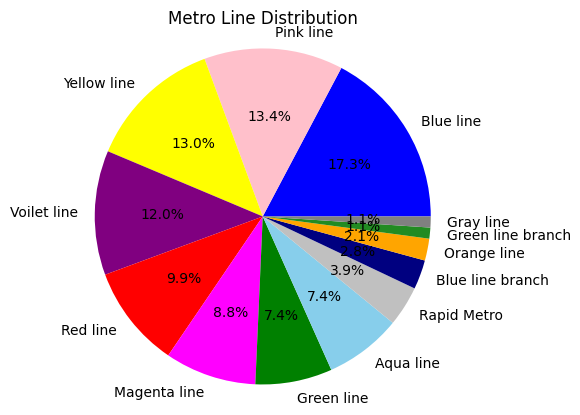

In [17]:
import matplotlib.pyplot as plt

# Create a dictionary to map Metro Line names to colors
line_colors = {
    'Red line': 'red',
    'Yellow line': 'yellow',
    'Blue line': 'blue',
    'Blue line branch': 'navy',
    'Green line branch': 'forestgreen',
    'Green line': 'green',
    'Rapid Metro': 'silver',
    'Voilet line': 'purple',  
    'Magenta line': 'magenta',
    'Pink line': 'pink',
    'Aqua line': 'skyblue',
    'Gray line': 'gray',
    'Orange line': 'orange'
    # Add more lines and colors as needed
}

# Calculate value counts for each Metro Line
line_counts = df_cleaned['Metro Line'].value_counts()

# Create a pie chart using custom colors
plt.pie(line_counts, labels=line_counts.index, autopct='%1.1f%%', colors=[line_colors[line] for line in line_counts.index])

# Set aspect ratio to be equal, so the pie is drawn as a circle.
plt.axis('equal')

# Add a title
plt.title('Metro Line Distribution')

# Display the pie chart
plt.show()

In [18]:
import folium

# Create a base map centered on Delhi
delhi_map = folium.Map(location=[28.6139, 77.2090], zoom_start=12)

# Add markers for each metro station
for index, row in df_cleaned.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Station Names']).add_to(delhi_map)

# Display the map
display(delhi_map)

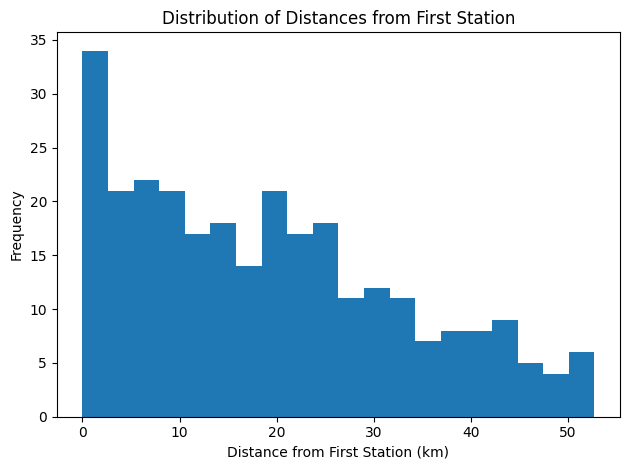

In [19]:
plt.hist(df_cleaned['Dist. From First Station(km)'], bins=20)
plt.xlabel('Distance from First Station (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Distances from First Station')
plt.tight_layout()
plt.show()

In [4]:
delhi_metro_2022

,line.name,total.passengers.per.day,route.length,pax.per.km
0,Yellow Line,1158931,49.00,23651.65
1,Blue Line,1126931,64.62,17439.35
2,Red Line,438317,34.55,12686.45
3,Violet Line,424254,46.34,9155.24
4,Magenta Line,321972,37.46,8595.09
5,Pink Line,399713,59.24,6747.35
6,Green Line,188108,28.79,6533.80


In [5]:
delhi_metro_2022.describe()

,total.passengers.per.day,route.length,pax.per.km
count,7.000000e+00,7.000000,7.000000
mean,5.797466e+05,45.714286,12115.561429
std,3.939726e+05,13.107023,6362.401992
min,1.881080e+05,28.790000,6533.800000
25%,3.608425e+05,36.005000,7671.220000
50%,4.242540e+05,46.340000,9155.240000
75%,7.826240e+05,54.120000,15062.900000
max,1.158931e+06,64.620000,23651.650000


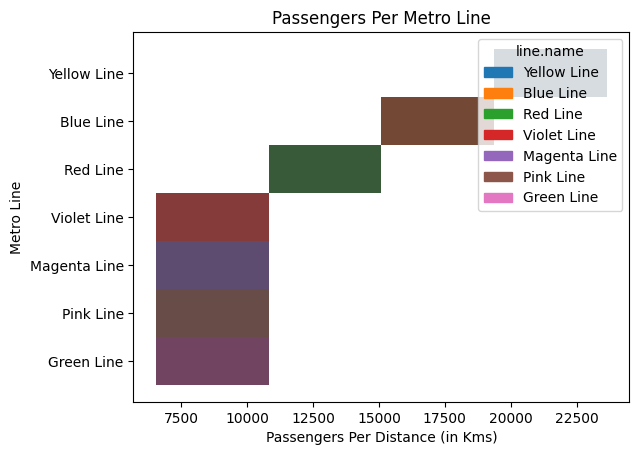

In [12]:
sns.histplot(x=delhi_metro_2022['pax.per.km'], y=delhi_metro_2022['line.name'], stat='count', bins='auto',multiple='layer', element='bars', fill=True, hue=delhi_metro_2022['line.name'])
plt.xlabel('Passengers Per Distance (in Kms)')
plt.ylabel('Metro Line')
plt.title('Passengers Per Metro Line')
plt.show()


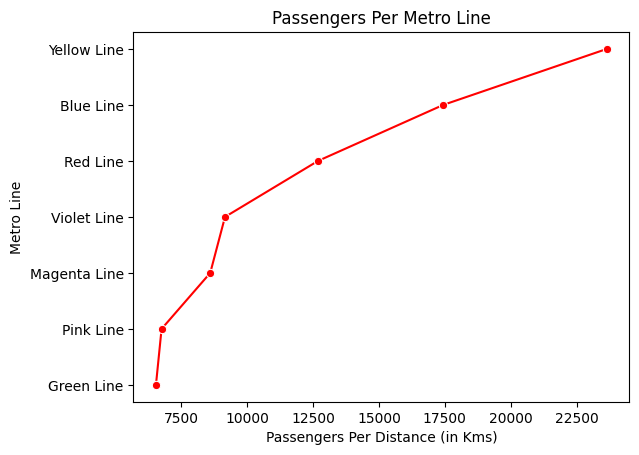

In [13]:
sns.lineplot(data=delhi_metro_2022, x=delhi_metro_2022['pax.per.km'], y=delhi_metro_2022['line.name'],estimator='mean', legend='auto',ci=68,color='red',marker='o')
plt.xlabel('Passengers Per Distance (in Kms)')
plt.ylabel('Metro Line')
plt.title('Passengers Per Metro Line')
plt.show()

In [14]:
data_overviews = {
    "agency": agency.head()
}
data_overviews2 = {
    "calendar": calendar.head()
}
data_overviews3 = {
    "routes": routes.head()
}
data_overviews4 = {
    "shapes": shapes.head()
}
data_overviews5 = {
    "stop_times": stop_times.head()
}
data_overviews6 = {
    "stops": stops.head()
}
data_overviews7 = {
    "trips": trips.head()
}
print(data_overviews,"\n")
print(data_overviews2,"\n")
print(data_overviews3,"\n")
print(data_overviews4,"\n")
print(data_overviews5,"\n")
print(data_overviews6,"\n")
print(data_overviews7,"\n")


{'agency':   agency_id                   agency_name                      agency_url  \
0      DMRC  Delhi Metro Rail Corporation  http://www.delhimetrorail.com/   

  agency_timezone  agency_lang  agency_phone  agency_fare_url  agency_email  
0    Asia/Kolkata          NaN           NaN              NaN           NaN  } 

{'calendar':   service_id  monday  tuesday  wednesday  thursday  friday  saturday  sunday  \
0    weekday       1        1          1         1       1         0       0   
1   saturday       0        0          0         0       0         1       0   
2     sunday       0        0          0         0       0         0       1   

   start_date  end_date  
0    20190101  20251231  
1    20190101  20251231  
2    20190101  20251231  } 

{'routes':    route_id  agency_id route_short_name  \
0        33        NaN           R_SP_R   
1        31        NaN           G_DD_R   
2        29        NaN           P_MS_R   
3        12        NaN             M_JB   
4       

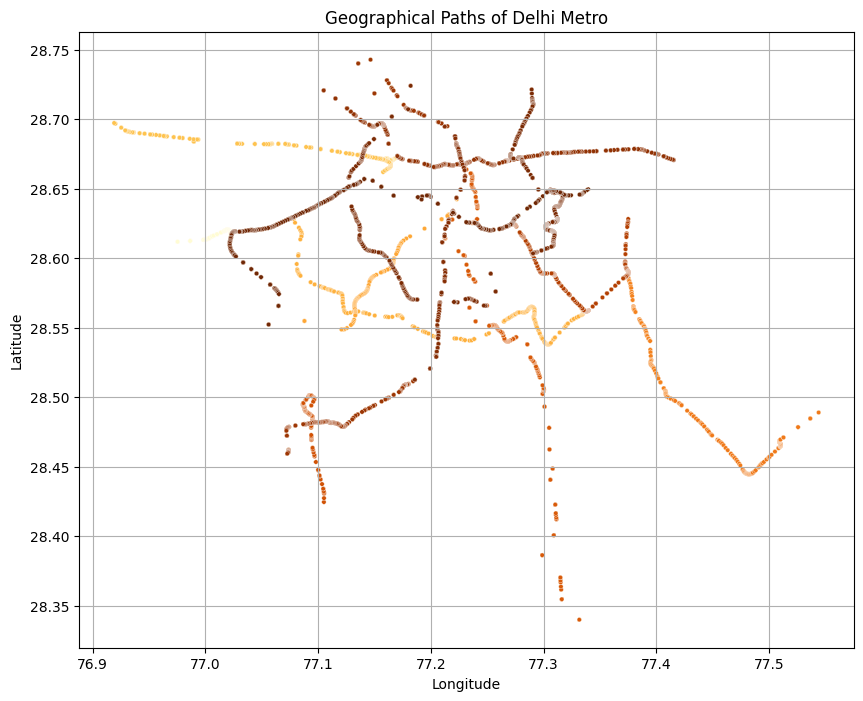

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='shape_pt_lon', y='shape_pt_lat', hue='shape_id', data=shapes, palette='YlOrBr', s=10, legend=None)
plt.title('Geographical Paths of Delhi Metro')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

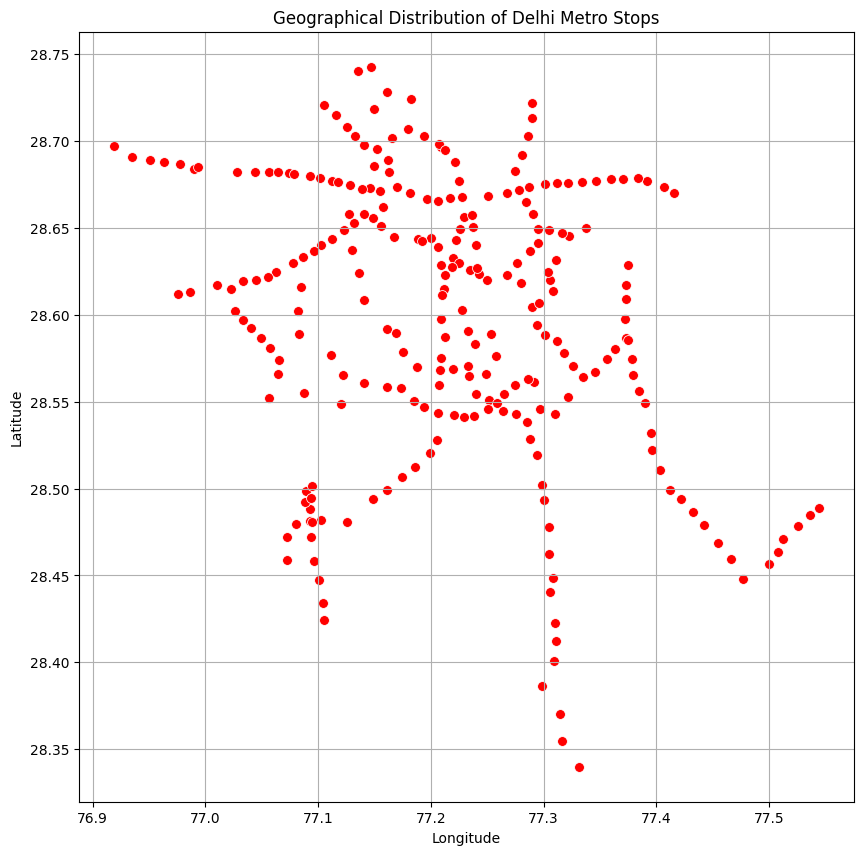

In [16]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='stop_lon', y='stop_lat', data=stops, color='red', s=50, marker='o')
plt.title('Geographical Distribution of Delhi Metro Stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

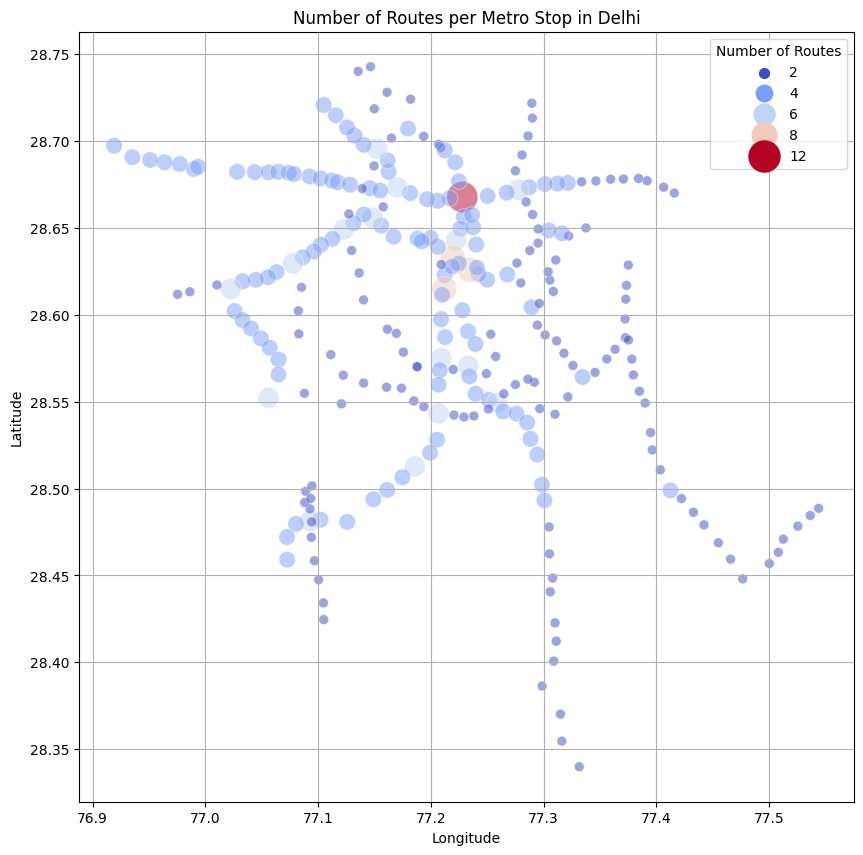

In [17]:
stops_with_routes = pd.merge(pd.merge(stop_times, trips, on='trip_id'), routes, on='route_id')

# count how many unique routes pass through each stop
stop_route_counts = stops_with_routes.groupby('stop_id')['route_id'].nunique().reset_index()
stop_route_counts = stop_route_counts.rename(columns={'route_id': 'number_of_routes'})

# merge this with stops to get the names and location for plotting
stop_route_counts = pd.merge(stop_route_counts, stops, on='stop_id')

# plot the number of routes per stop
plt.figure(figsize=(10, 10))
sns.scatterplot(x='stop_lon', y='stop_lat', size='number_of_routes', hue='number_of_routes',
                sizes=(50, 500), alpha=0.5, palette='coolwarm', data=stop_route_counts)
plt.title('Number of Routes per Metro Stop in Delhi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Number of Routes')
plt.grid(True)
plt.show()

/tmp/ipykernel_33/189162758.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_times_intervals['part_of_day'] = stop_times_intervals['arrival_time_dt'].apply(part_of_day)


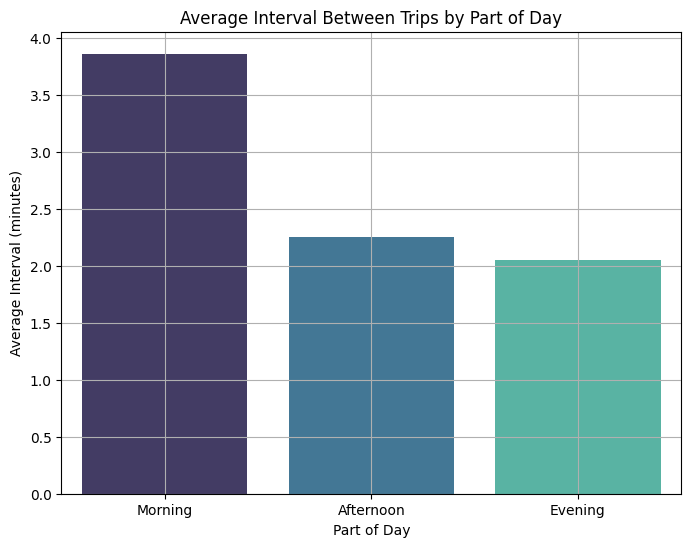

In [18]:
# converting stop_times 'arrival_time' from string to datetime.time for easier manipulation
import datetime as dt

# function to convert time string to datetime.time
def convert_to_time(time_str):
    try:
        return dt.datetime.strptime(time_str, '%H:%M:%S').time()
    except ValueError:
        # Handle cases where the hour might be greater than 23 (e.g., 24:00:00 or 25:00:00)
        hour, minute, second = map(int, time_str.split(':'))
        return dt.time(hour % 24, minute, second)

stop_times['arrival_time_dt'] = stop_times['arrival_time'].apply(convert_to_time)

# calculate the difference in arrival times for subsequent trips at each stop
stop_times_sorted = stop_times.sort_values(by=['stop_id', 'arrival_time_dt'])
stop_times_sorted['next_arrival_time'] = stop_times_sorted.groupby('stop_id')['arrival_time_dt'].shift(-1)

# function to calculate the difference in minutes between two times
def time_difference(time1, time2):
    if pd.isna(time1) or pd.isna(time2):
        return None
    full_date_time1 = dt.datetime.combine(dt.date.today(), time1)
    full_date_time2 = dt.datetime.combine(dt.date.today(), time2)
    return (full_date_time2 - full_date_time1).seconds / 60

stop_times_sorted['interval_minutes'] = stop_times_sorted.apply(lambda row: time_difference(row['arrival_time_dt'], row['next_arrival_time']), axis=1)

# drop NaN values from intervals (last trip of the day)
stop_times_intervals = stop_times_sorted.dropna(subset=['interval_minutes'])

# average intervals by time of day (morning, afternoon, evening)
def part_of_day(time):
    if time < dt.time(12, 0):
        return 'Morning'
    elif time < dt.time(17, 0):
        return 'Afternoon'
    else:
        return 'Evening'

stop_times_intervals['part_of_day'] = stop_times_intervals['arrival_time_dt'].apply(part_of_day)
average_intervals = stop_times_intervals.groupby('part_of_day')['interval_minutes'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='part_of_day', y='interval_minutes', data=average_intervals, order=['Morning', 'Afternoon', 'Evening'], palette='mako')
plt.title('Average Interval Between Trips by Part of Day')
plt.xlabel('Part of Day')
plt.ylabel('Average Interval (minutes)')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


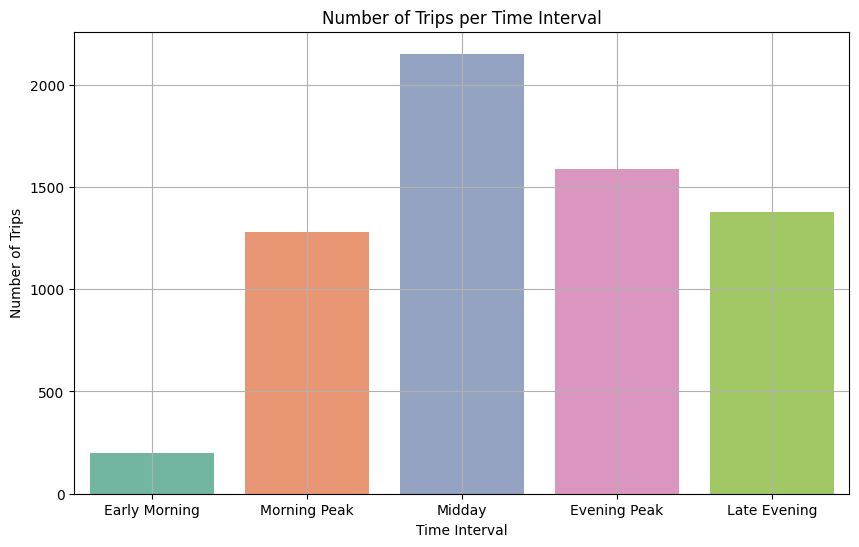

In [19]:
def classify_time_interval(time):
    if time < dt.time(6, 0):
        return 'Early Morning'
    elif time < dt.time(10, 0):
        return 'Morning Peak'
    elif time < dt.time(16, 0):
        return 'Midday'
    elif time < dt.time(20, 0):
        return 'Evening Peak'
    else:
        return 'Late Evening'

# apply time interval classification
stop_times['time_interval'] = stop_times['arrival_time_dt'].apply(classify_time_interval)

# count the number of trips per time interval
trips_per_interval = stop_times.groupby('time_interval')['trip_id'].nunique().reset_index()
trips_per_interval = trips_per_interval.rename(columns={'trip_id': 'number_of_trips'})

# sorting the dataframe
ordered_intervals = ['Early Morning', 'Morning Peak', 'Midday', 'Evening Peak', 'Late Evening']
trips_per_interval['time_interval'] = pd.Categorical(trips_per_interval['time_interval'], categories=ordered_intervals, ordered=True)
trips_per_interval = trips_per_interval.sort_values('time_interval')

# plotting the number of trips per time interval
plt.figure(figsize=(10, 6))
sns.barplot(x='time_interval', y='number_of_trips', data=trips_per_interval, palette='Set2')
plt.title('Number of Trips per Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

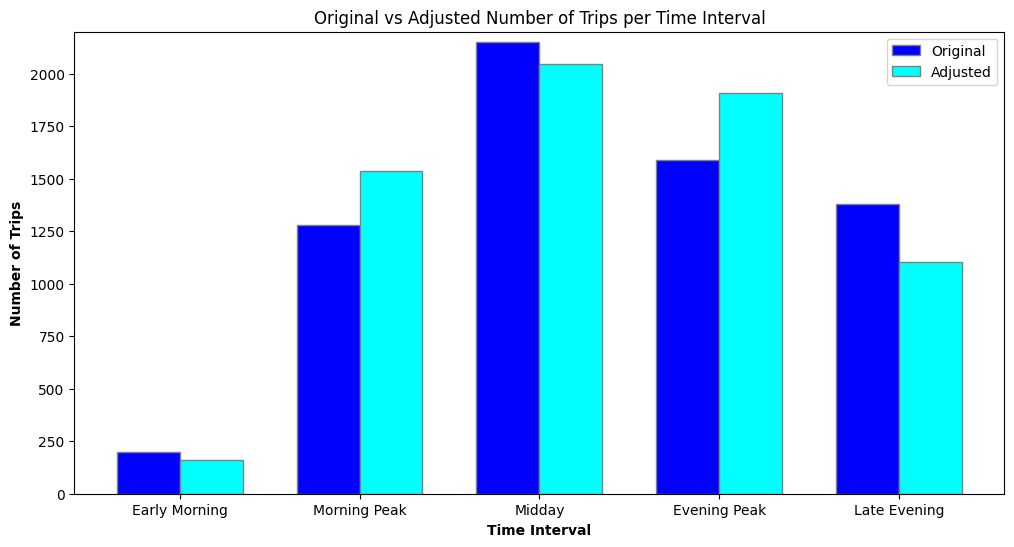

In [20]:
#Morning and Evening Peaks: We increased the number of trips by 20% each, anticipating higher demand during these hours.
#Early Morning: We decreased the number of trips by 20% on account of low traffic during early morning.
#Midday: We further decreased number of trips by 5% by a significantly small fraction for statsitical purpose.
#Late Evening: We decrese the number of trip by 20% on account of flexible time constraints.



#adjusted_trips_per_interval = trips_per_interval.copy()
adjustment_factors = {'Morning Peak': 1.20, 'Evening Peak': 1.20, 'Midday': 0.95, 'Early Morning': 0.80, 'Late Evening': 0.80}

# apply the adjustments
adjusted_trips_per_interval['adjusted_number_of_trips'] = adjusted_trips_per_interval.apply(
    lambda row: int(row['number_of_trips'] * adjustment_factors[row['time_interval']]), axis=1)

# plotting original vs adjusted number of trips per time interval
plt.figure(figsize=(12, 6))
bar_width = 0.35
r1 = range(len(adjusted_trips_per_interval))
r2 = [x + bar_width for x in r1]

plt.bar(r1, adjusted_trips_per_interval['number_of_trips'], color='blue', width=bar_width, edgecolor='grey', label='Original')
plt.bar(r2, adjusted_trips_per_interval['adjusted_number_of_trips'], color='cyan', width=bar_width, edgecolor='grey', label='Adjusted')

plt.xlabel('Time Interval', fontweight='bold')
plt.ylabel('Number of Trips', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(adjusted_trips_per_interval))], adjusted_trips_per_interval['time_interval'])
plt.title('Original vs Adjusted Number of Trips per Time Interval')
plt.legend()
plt.ylim(0,2200)

plt.show()